## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
# Read data
df = pd.read_csv("ab_data.csv")
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
# Check the number of rows in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
# check the number of unique values
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
# calculate the percentages of converted (1) and not converted (0)
converted = df.converted.value_counts(normalize=True)
converted

0    0.880341
1    0.119659
Name: converted, dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Check the dataframe when the group and landing pages values are not mateched as tratement with new page
df_new_treatment = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].converted.count()
df_new_treatment

3893

f. Do any of the rows have missing values?

In [7]:
# checking for any null values in the dataframe's rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


##### No rows have missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
# store data in df2 for when treatment and new pages are not matched
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)
df2.sample(5)

,user_id,timestamp,group,landing_page,converted
78584,852545,2017-01-17 00:22:57.640474,control,old_page,0
165673,894965,2017-01-10 18:07:42.252053,treatment,new_page,0
50580,789634,2017-01-20 15:03:54.127060,control,old_page,0
48118,722536,2017-01-23 08:40:16.607287,treatment,new_page,0
200521,925404,2017-01-12 03:59:48.264057,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Check unique user_ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# find the repeated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# find the repeated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# drop the repeated row
df2 = df2.drop_duplicates(subset=['user_id'])
df2.sample(5)

,user_id,timestamp,group,landing_page,converted
15388,792071,2017-01-19 18:01:16.592632,treatment,new_page,0
207495,825109,2017-01-17 00:02:50.761492,control,old_page,0
71390,868267,2017-01-06 11:08:27.123681,control,old_page,0
40682,918895,2017-01-07 03:31:53.416268,control,old_page,0
2542,743106,2017-01-22 12:25:49.065253,control,old_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Calculating the probability of an individual converting regardless of the page they receive (1) 
converting = df2.query("converted == '1'")["user_id"].shape[0] / df2.shape[0]
converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# calculate if an individual was in the control group, what is the probability they converted
control_converted = df2.query("group == 'control'")["converted"].mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# calculate if an individual was in the treatment group, what is the probability they converted
treatment_converted = df2.query("group == 'treatment'")["converted"].mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# probability that an individual received the new page
new_page_received = df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]
new_page_received

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### No, there are no sufficient evidence to conclude that the new treatment page leads to more conversions, as the conversion rate of the new page is 0.118808 in the tratment group, compared to 0.120386 of the converted in the control group. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis H0: $p_{new}$ - $p_{old}$ =< 0      
Alternative Hypothesis H1: $p_{new}$ - $p_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# conversion rate 
p_new = df2.query("converted == '1'").user_id.shape[0] / df2.user_id.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# conversion rate
p_old = df2.query("converted == '1'").user_id.shape[0] / df2.user_id.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# number of indiviuals in treatment group
n_new = df2.query("group == 'treatment'").user_id.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# number of indiviuals in control group
n_old = df2.query("group == 'control'").user_id.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#𝑛 𝑛𝑒𝑤 transactions with a conversion rate of 𝑝𝑛𝑒𝑤 under the null
new_page_converted = np.random.choice([1,0], size=n_new, p=[0.1196, (1-0.1196)])
new_page_converted

array([1, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#𝑛 old transactions with a conversion rate of 𝑝 old under the null
old_page_converted = np.random.choice([1,0], size=n_old, p=[0.1196, (1-0.1196)])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#𝑝 𝑛𝑒𝑤  - 𝑝 𝑜𝑙𝑑 
p_new_old = new_page_converted.mean() - old_page_converted.mean()
p_new_old

0.0013261766807717013

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []

# for loop to simulate the process
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[0.1196, (1-0.1196)]) 
    old_page_converted = np.random.choice([1,0], size=n_old, p=[0.1196, (1-0.1196)])   
    p_new_old = new_page_converted.mean() - old_page_converted.mean()
# appened to p_diffs
    p_diffs.append(p_new_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
# convert to np array
p_diffs = np.array(p_diffs)
p_diffs

array([  1.42343508e-04,  -9.03672118e-04,  -1.43379541e-03, ...,
         2.59394456e-04,  -3.68503393e-05,  -2.08080934e-03])

(array([   16.,   134.,   563.,  1649.,  2751.,  2692.,  1536.,   534.,
          114.,    11.]),
 array([ -4.46884663e-03,  -3.56997889e-03,  -2.67111115e-03,
         -1.77224340e-03,  -8.73375656e-04,   2.54920887e-05,
          9.24359833e-04,   1.82322758e-03,   2.72209532e-03,
          3.62096307e-03,   4.51983081e-03]),
 <a list of 10 Patch objects>)

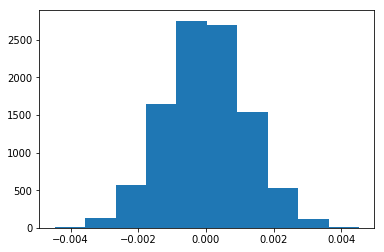

In [27]:
# Histogram
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# observed diffrence
obs = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
obs

-0.0015782389853555567

In [29]:
# propetion
(p_diffs > obs).mean()

0.90129999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### The last proprtion is called the p value, and as it is larger than the critical alfa (0.05) value, thats mean we can accept the null hyposis, meaning that the new page is not better than the old one

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
# import needed liberaries
import statsmodels.api as sm

# calculate the conversion rates for new and old pages
convert_old = df2.query("landing_page == 'old_page' and converted == '1'").user_id.shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == '1'").user_id.shape[0]


convert_old, convert_new

(17489, 17264)

In [31]:
# calculate number of rows associated with the old page and new pages
n_old = df2.query("landing_page == 'old_page'").user_id.shape[0]
n_new = df2.query("landing_page == 'new_page'").user_id.shape[0]

n_old, n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [53]:
# calculate the z score and p value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')

z_score, p_value


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### As before, accept the null hypothesis (the two pages are not diffrent in conversion rates) as the p value (0.91) is more than the alfa value (0.05).
#### Yes, the p-vale are the same, as in both cases are calculated on one-sided basis (as the null and alternative hypothesis are either >= or <).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [8]:
# add intercept column
df2["intercept"] = 1

In [9]:
# create dummies variables for group (add 1 for treatment)
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
210628,924480,2017-01-08 22:02:28.713636,control,old_page,1,1,0
260318,678401,2017-01-05 04:52:36.371082,control,old_page,0,1,0
72614,934802,2017-01-06 18:53:23.762959,control,old_page,0,1,0
208285,691932,2017-01-19 22:56:21.915150,control,old_page,0,1,0
286913,748763,2017-01-24 05:26:37.009857,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [10]:
# fit model
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
logit_results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# check regression summary
logit_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-07 19:05 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

#### The hypothesis for the logestic regression is:
###### Null Hypothesis: there are no relation between ab_page and the concersion rate,
###### Alternative hypothesis: there are relation between ab_page and the concersion rate.

#### And as the ab_page p-value (0.1897) is larger than the alfa critical value (0.05), wee accept the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

##### It's good to add more factors to investigate their relationship to the conversion rates.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [11]:
# upload the countries data
countries = pd.read_csv("countries.csv")
countries.sample(5)

,user_id,country
121124,933423,US
113973,700288,US
224016,899341,US
55080,706649,UK
182286,769909,US


In [12]:
# join the countries data frame to df2
df2_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df2_new.sample(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
905398,US,2017-01-07 23:18:51.045526,treatment,new_page,0,1,1
668210,US,2017-01-18 19:04:41.283109,control,old_page,0,1,0
643096,US,2017-01-15 18:35:35.578230,control,old_page,0,1,0
797839,UK,2017-01-08 02:24:20.952683,control,old_page,0,1,0
649428,US,2017-01-13 03:05:55.542878,treatment,new_page,1,1,1
642455,US,2017-01-07 22:10:17.509763,treatment,new_page,0,1,1
716896,UK,2017-01-15 17:59:03.065352,treatment,new_page,1,1,1
917818,US,2017-01-19 08:41:06.965792,control,old_page,1,1,0
692443,US,2017-01-09 15:27:15.321613,control,old_page,0,1,0


In [13]:
# create dummies variables for country
df2_new[['US', 'CA']] = pd.get_dummies(df2_new['country'])[['US', 'CA']]
df2_new.sample(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA
user_id,,,,,,,,,
785435,US,2017-01-14 14:39:08.698201,treatment,new_page,1,1,1,1,0
776868,US,2017-01-09 21:25:59.295978,control,old_page,1,1,0,1,0
943639,US,2017-01-22 17:39:29.422331,control,old_page,0,1,0,1,0
898867,US,2017-01-15 20:46:57.758854,treatment,new_page,0,1,1,1,0
668468,US,2017-01-12 19:35:17.757053,control,old_page,1,1,0,1,0
915569,US,2017-01-23 18:29:23.272148,treatment,new_page,0,1,1,1,0
786056,US,2017-01-23 14:22:30.238200,treatment,new_page,0,1,1,1,0
848196,US,2017-01-08 09:39:28.759963,control,old_page,0,1,0,1,0
636937,US,2017-01-15 00:20:30.422809,treatment,new_page,1,1,1,1,0


In [14]:
# fit model
log_mod_countries = sm.Logit(df2_new['converted'], df2_new[['intercept','ab_page', 'US', 'CA']])
logit_results_Countries = log_mod_countries.fit()
logit_results_Countries.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-07 20:28 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4143  0.0000  -2.0043  -1.9544
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
US           -0.0099    0.0133    -0.7437  0.4570  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

#### Conclusion: The countries have no effect on the conversion rate, as the p-vlaues for US and CA (0.4570 and 0.0745 respectivly are higher then the critical alfa value (0.05), so we can accept the null hypothesis, meaning there is no diffrence between the 2 pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
# check the countries
df2_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
# create dummies variables for country
df2_new[['US', 'CA']] = pd.get_dummies(df2_new['country'])[['US', 'CA']]
df2_new.sample(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,CA
user_id,,,,,,,,,
748357,US,2017-01-15 22:14:18.864865,treatment,new_page,0,1,1,1,0
838869,US,2017-01-17 17:36:52.289945,treatment,new_page,0,1,1,1,0
708907,UK,2017-01-12 19:19:00.281038,control,old_page,1,1,0,0,0
798203,UK,2017-01-04 22:26:26.836936,control,old_page,0,1,0,0,0
792299,UK,2017-01-12 13:13:50.695861,control,old_page,0,1,0,0,0
775572,US,2017-01-16 11:25:00.148459,control,old_page,1,1,0,1,0
675877,UK,2017-01-20 05:54:18.068963,control,old_page,0,1,0,0,0
901039,US,2017-01-17 10:25:56.064178,treatment,new_page,0,1,1,1,0
828721,US,2017-01-22 22:37:24.312405,control,old_page,0,1,0,1,0


In [49]:
# add the interaction 
df2_new['ab_page_US'] = df2_new['ab_page'] * df2_new['US']
df2_new['ab_page_CA'] = df2_new['ab_page'] * df2_new['CA']

In [51]:
# fit model
final_model = sm.Logit(df2_new['converted'], df2_new[['intercept','ab_page','US','CA','ab_page_US','ab_page_CA']])
logit_results_new = final_model.fit()
logit_results_new.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-07 19:09 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
ab_page_US   -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
ab_page_CA   -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
==================================================================

"""

#### The hypothesis for the logestic regression is:
###### Null Hypothesis: there are no relation between ab_page and the concersion rate,
###### Alternative hypothesis: there are relation between ab_page and the concersion rate.
#### And as the ab_page, CA , US, interaction between each of CA and US and ab_page p-values (0.6349, 0.7674, 0.7598, 0.1681 and 0.2377 respectivly) is larger than the alfa critical value (0.05), so, we accept the null hypothesis.

### Conclusion

#### As conclusion, both the new and old pages have no diffrent statistically or practically (as the mean diffrence between the 2 pages are 0), so it is highly recomended to redesign the new page again and retest it.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

Useful Resourses:

https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.summary2.html?highlight=summary2#statsmodels.discrete.discrete_model.LogitResults.summary2